In [12]:
import numpy as np
import pandas as pd
import pymc as pm
import nutpie
import arviz as az
import pytensor.tensor as at
import matplotlib.pyplot as plt
from util import build_XY

In [13]:
gp_samples = az.InferenceData.from_netcdf("./mogp.nc")

In [15]:
n_outputs = 3
country_mapping = {"US":0, "UK":1, "AU":2} 
M = 90
x_new = np.linspace(0, M-1, M)[:, None]
X_new, _, _ = build_XY([x_new for idx in range(n_outputs)])
X_new.shape

(270, 2)

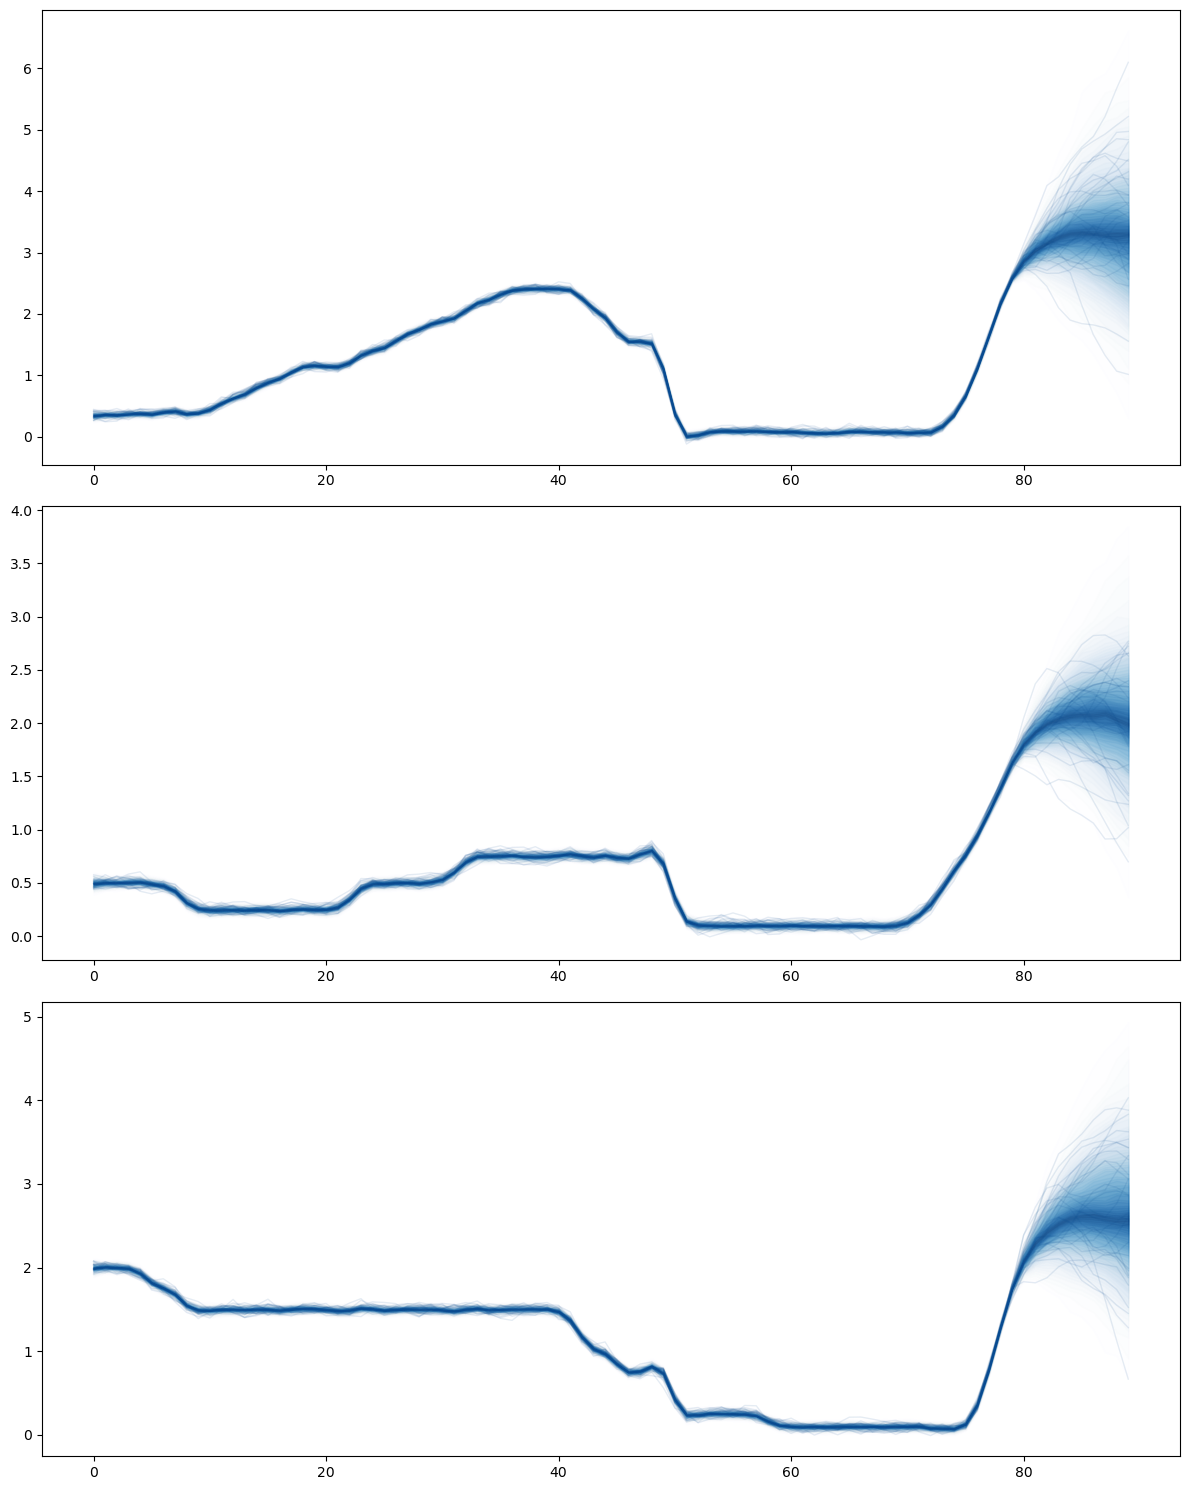

In [17]:
from pymc.gp.util import plot_gp_dist

f_pred = gp_samples.posterior_predictive["preds"].sel(chain=0)
fig, axes = plt.subplots(n_outputs,1, figsize=(12,15))

for idx, country in enumerate(country_mapping.keys()):
    # Prediction
    plot_gp_dist(axes[idx], f_pred[:,M*idx:M*(idx+1)], 
                 X_new[M*idx:M*(idx+1),0], 
                 palette="Blues", fill_alpha=0.1, samples_alpha=0.1)    
    # Train data points
#     cond = adf["country"] == country
#     axes[idx].scatter(adf.loc[cond, "x"], adf.loc[cond, "rate"], color='r')
#     axes[idx].set_title(country)
plt.tight_layout()

In [18]:
X_new[M*idx:M*(idx+1),0].shape

(90,)

In [19]:
X_new.shape

(270, 2)

In [21]:
f_pred[:,M*idx:M*(idx+1)]

<xarray.DataArray 'preds' (draw: 500, preds_dim_2: 90)>
[45000 values with dtype=float64]
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) int64 180 181 182 183 184 ... 265 266 267 268 269

In [84]:
x_ = X_new[M*idx:M*(idx+1),0]
y_ = f_pred[:,M*idx:M*(idx+1)]

In [85]:
import hvplot.pandas

In [86]:
import hvplot.pandas  # noqa
from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature as sst
sst.hvplot()

:Curve   [time]   (temperature)

In [87]:
sst

,temperature
time,
2016-02-15 00:00:00+00:00,4.929
2016-02-15 00:30:00+00:00,4.887
2016-02-15 01:00:00+00:00,4.821
2016-02-15 01:30:00+00:00,4.837
2016-02-15 02:00:00+00:00,4.830
...,...
2017-03-21 22:00:00+00:00,4.000
2017-03-21 22:30:00+00:00,3.975
2017-03-21 23:00:00+00:00,4.017


In [88]:
dates_idx = pd.DataFrame({"date":pd.date_range("2016-01-01", "2023-06-01", freq='MS')}).reset_index()
dates_idx = dates_idx.rename(columns={"index":"x"})
print(dates_idx.shape)
dates_idx.head()

(90, 2)


,x,date
0,0,2016-01-01
1,1,2016-02-01
2,2,2016-03-01
3,3,2016-04-01
4,4,2016-05-01


In [89]:
y_

<xarray.DataArray 'preds' (draw: 500, preds_dim_2: 90)>
[45000 values with dtype=float64]
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) int64 180 181 182 183 184 ... 265 266 267 268 269

In [90]:
dates_idx.set_index("date").hvplot()

:Curve   [date]   (x)

In [91]:
import xarray as xr
import hvplot.xarray  # noqa

air_ds = xr.tutorial.open_dataset('air_temperature').load()
air_ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [92]:
air_ds.mean(dim=['lat', 'lon']).hvplot(by='time.hour', groupby=['time.year', 'time.month'])

:DynamicMap   [time.year,time.month]
   :NdOverlay   [time.hour]
      :Curve   [time]   (air)

In [93]:
y_.expand_dims(dim={"time":dates_idx["date"]})

<xarray.DataArray 'preds' (time: 90, draw: 500, preds_dim_2: 90)>
array([[[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
        ...,
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]],

       [[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
...
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]],

       [[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
        ...,
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]]])
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2023-06-01
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) int64 180 181 182 183 184 ... 265 266 267 268 269

In [94]:
y

<xarray.DataArray 'preds' (time: 90, draw: 500, preds_dim_2: 90)>
array([[[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
        ...,
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]],

       [[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
...
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]],

       [[1.92207806, 1.95390232, 1.9915839 , ..., 2.71524365,
         2.7531769 , 2.64604394],
        [1.97665235, 1.96627052, 1.95808748, ..., 1.71765888,
         1.6733309 , 1.68244262],
        [1.97991889, 2.01466606, 2.04174479, ..., 1.98207722,
         2.12852728, 2.18394119],
        ...,
        [2.01694907, 2.05153645, 1.98705876, ..., 3.59205411,
         3.63211926, 3.61716365],
        [1.92198722, 1.99261188, 2.0319243 , ..., 2.23283297,
         1.95745747, 1.63593469],
        [1.955658  , 2.01697335, 1.99554733, ..., 3.35363956,
         3.35167052, 3.30263473]]])
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2023-06-01
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) int64 180 181 182 183 184 ... 265 266 267 268 269

In [95]:
y.mean(dim=["draw"]).hvplot(by="time")

:NdOverlay   [time]
   :Curve   [preds_dim_2]   (preds)

In [96]:
y.mean(dim=["draw"]).hvplot(by="time")

:NdOverlay   [time]
   :Curve   [preds_dim_2]   (preds)

In [97]:
import xarray as xr
import hvplot.xarray  # noqa

air_ds = xr.tutorial.open_dataset('air_temperature').load()
air = air_ds.air
air_ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [98]:
air1d = air.sel(lat=40, lon=285)
air1d.hvplot()

:Curve   [time]   (air)

In [99]:
y_

<xarray.DataArray 'preds' (draw: 500, preds_dim_2: 90)>
array([[1.922078, 1.953902, 1.991584, ..., 2.715244, 2.753177, 2.646044],
       [1.976652, 1.966271, 1.958087, ..., 1.717659, 1.673331, 1.682443],
       [1.979919, 2.014666, 2.041745, ..., 1.982077, 2.128527, 2.183941],
       ...,
       [2.016949, 2.051536, 1.987059, ..., 3.592054, 3.632119, 3.617164],
       [1.921987, 1.992612, 2.031924, ..., 2.232833, 1.957457, 1.635935],
       [1.955658, 2.016973, 1.995547, ..., 3.35364 , 3.351671, 3.302635]])
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) int64 180 181 182 183 184 ... 265 266 267 268 269

In [100]:
# y_ = y_.expand_dims(dim={"time":dates_idx["date"]})

In [101]:
y_["preds_dim_2"] = ("preds_dim_2", dates_idx["date"])

In [102]:
y_

<xarray.DataArray 'preds' (draw: 500, preds_dim_2: 90)>
array([[1.922078, 1.953902, 1.991584, ..., 2.715244, 2.753177, 2.646044],
       [1.976652, 1.966271, 1.958087, ..., 1.717659, 1.673331, 1.682443],
       [1.979919, 2.014666, 2.041745, ..., 1.982077, 2.128527, 2.183941],
       ...,
       [2.016949, 2.051536, 1.987059, ..., 3.592054, 3.632119, 3.617164],
       [1.921987, 1.992612, 2.031924, ..., 2.232833, 1.957457, 1.635935],
       [1.955658, 2.016973, 1.995547, ..., 3.35364 , 3.351671, 3.302635]])
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) datetime64[ns] 2016-01-01 ... 2023-06-01

In [103]:
y_1d = y_.sel(draw=1)
y_1d

<xarray.DataArray 'preds' (preds_dim_2: 90)>
array([1.976652, 1.966271, 1.958087, 1.967134, 1.939473, 1.817082, 1.745633,
       1.715538, 1.613437, 1.508529, 1.463321, 1.472241, 1.508252, 1.526374,
       1.552608, 1.547156, 1.513997, 1.479587, 1.462754, 1.457047, 1.523441,
       1.552269, 1.478284, 1.491343, 1.450712, 1.501087, 1.470525, 1.498346,
       1.530548, 1.538287, 1.51333 , 1.486659, 1.528811, 1.52918 , 1.524066,
       1.494621, 1.529673, 1.49573 , 1.503381, 1.470769, 1.451631, 1.31956 ,
       1.107147, 1.033287, 0.926508, 0.897109, 0.774844, 0.782619, 0.822289,
       0.756223, 0.467848, 0.251545, 0.250765, 0.276573, 0.264691, 0.222245,
       0.181727, 0.178754, 0.129215, 0.106272, 0.086346, 0.075011, 0.049766,
       0.029284, 0.07433 , 0.067795, 0.092898, 0.118492, 0.128174, 0.134981,
       0.143995, 0.175956, 0.113489, 0.091267, 0.060162, 0.134774, 0.335204,
       0.761897, 1.256094, 1.775798, 2.272003, 2.616443, 2.732063, 2.586647,
       2.40402 , 2.205053, 1.929807, 1.717659, 1.673331, 1.682443])
Coordinates:
    chain        int64 0
    draw         int64 1
  * preds_dim_2  (preds_dim_2) datetime64[ns] 2016-01-01 ... 2023-06-01

In [110]:
y1_d = y_1d.rename({"preds_dim_2":"time"})

In [115]:
y1_d.hvplot()

:Curve   [time]   (preds)

In [119]:
y_

<xarray.DataArray 'preds' (draw: 500, preds_dim_2: 90)>
array([[1.922078, 1.953902, 1.991584, ..., 2.715244, 2.753177, 2.646044],
       [1.976652, 1.966271, 1.958087, ..., 1.717659, 1.673331, 1.682443],
       [1.979919, 2.014666, 2.041745, ..., 1.982077, 2.128527, 2.183941],
       ...,
       [2.016949, 2.051536, 1.987059, ..., 3.592054, 3.632119, 3.617164],
       [1.921987, 1.992612, 2.031924, ..., 2.232833, 1.957457, 1.635935],
       [1.955658, 2.016973, 1.995547, ..., 3.35364 , 3.351671, 3.302635]])
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * preds_dim_2  (preds_dim_2) datetime64[ns] 2016-01-01 ... 2023-06-01

In [141]:
df = pd.read_csv("../data/interest_rates.csv")
df["date"] = pd.to_datetime(df["date"])
df.shape
df.head()

In [173]:
(y_.quantile(q=0.1, dim="draw").hvplot(label="10% Quantile", alpha=0.5) * 
 y_.quantile(q=0.9, dim="draw").hvplot(label="90% Quantile", alpha=0.5) * 
 y_.mean(dim="draw").hvplot(label='mean', color='red', line_width=3) *
 df[df["country"] == "AU"].hvplot.points("date", "rate", alpha=0.5, label="observation")  
)

:Overlay
   .Curve.A_10_percent_Quantile :Curve   [preds_dim_2]   (preds)
   .Curve.A_90_percent_Quantile :Curve   [preds_dim_2]   (preds)
   .Curve.Mean                  :Curve   [preds_dim_2]   (preds)
   .Points.Observation          :Points   [date,rate]

In [174]:
import panel as pn

pn.extension("tabulator")

import hvplot.pandas
import hvplot.xarray

In [177]:
day_slider = pn.widgets.IntSlider(name="day", start=1, end=365, step=7)
countries_selector = pn.widgets.Select(
    name="countries", options=["US", "UK", "AU"]
)

In [178]:
countries_selector

Select(name='countries', options=['US', 'UK', 'AU'], value='US')

In [179]:
type(countries_selector)

panel.widgets.select.Select